# Laboratorio 1
### Javier Ovalle, José Ángel Morales, Ricardo Morales; 22103, 22689, 22289
### Data Science
Link del repositorio: https://github.com/Saiyan-Javi/Lab1DS

In [10]:
from bs4 import BeautifulSoup
import csv
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Attempting to load Excel file from: C:\Users\javie\Documents\UVG\Cuarto año\Segundo Semestre\Data Science\Archivos Lab1\IMPORTACIONES.xlsx
Using sheet name: Hoja1
Selected columns: ['Diesel', 'Gas licuado de petróleo', 'Gasolina regular', 'Gasolina superior']
Date column: Fecha

✅ Archivo de Excel cargado exitosamente.

🚀 Iniciando Análisis Exploratorio de Datos (EDA) 🚀

✨ Columnas seleccionadas para el análisis: ['Diesel', 'Gas licuado de petróleo', 'Gasolina regular', 'Gasolina superior'] y Fecha

--- 1. Información General y Estadísticas Descriptivas ---

📋 Información del DataFrame (primeras filas):

      Diesel  Gas licuado de petróleo  Gasolina regular  Gasolina superior  \
0  566101.99            194065.738095         177776.50          373963.96   
1  489525.80            170703.380952         123115.99          243091.07   
2  575559.68            161837.371429         161726.42          312084.38   
3  437745.42            163048.642857         127338.74          285054.89  

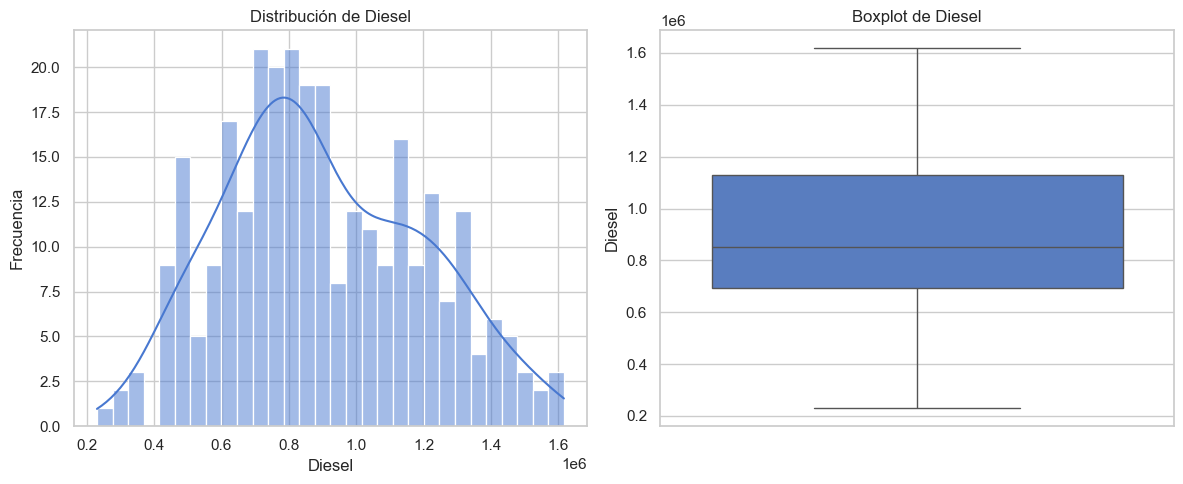

📊 La distribución de 'Diesel' muestra una asimetría de 0.28 y una curtosis de -0.61.

----------------------------------------------------------------------



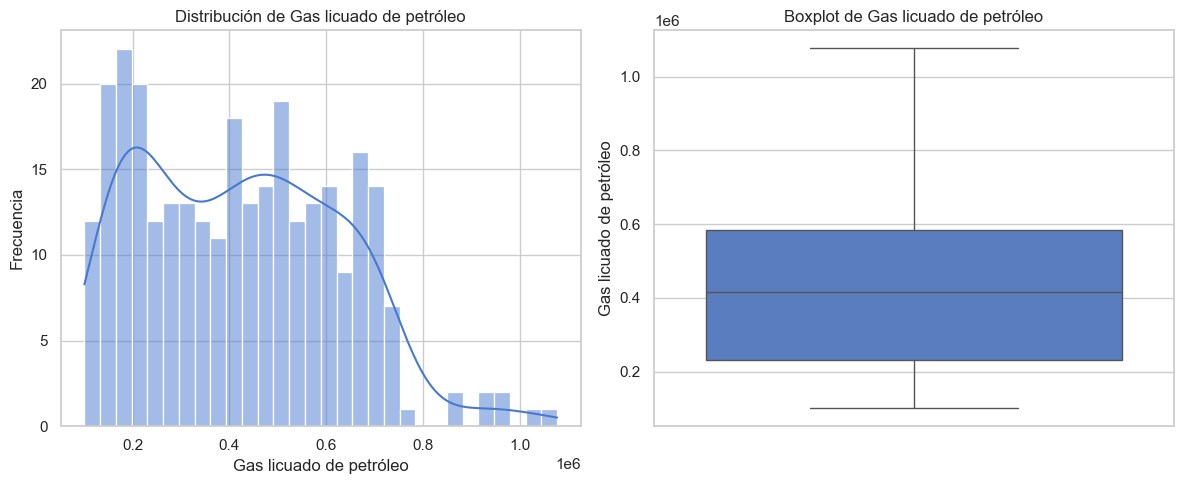

📊 La distribución de 'Gas licuado de petróleo' muestra una asimetría de 0.41 y una curtosis de -0.44.

----------------------------------------------------------------------



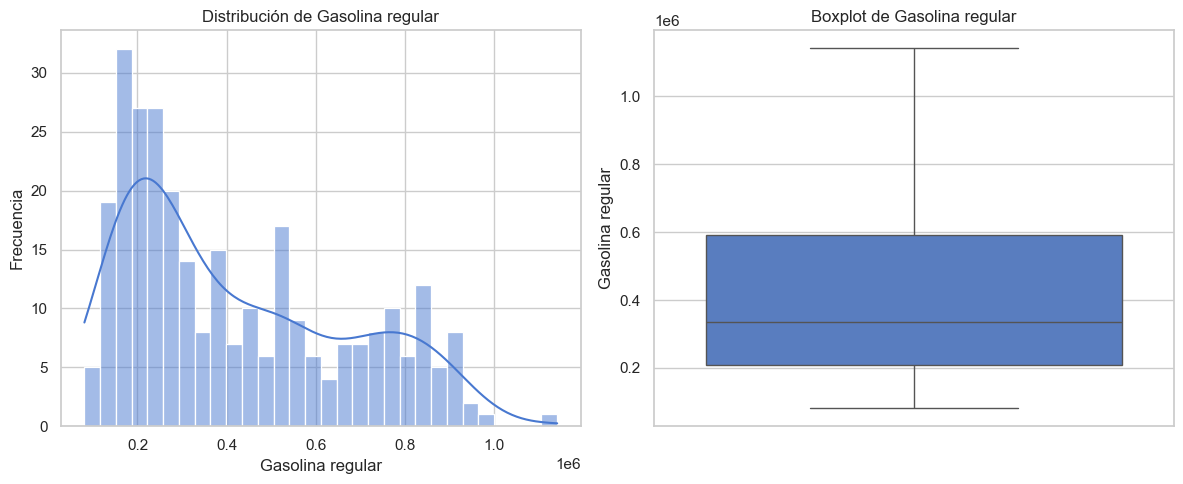

📊 La distribución de 'Gasolina regular' muestra una asimetría de 0.66 y una curtosis de -0.78.

----------------------------------------------------------------------



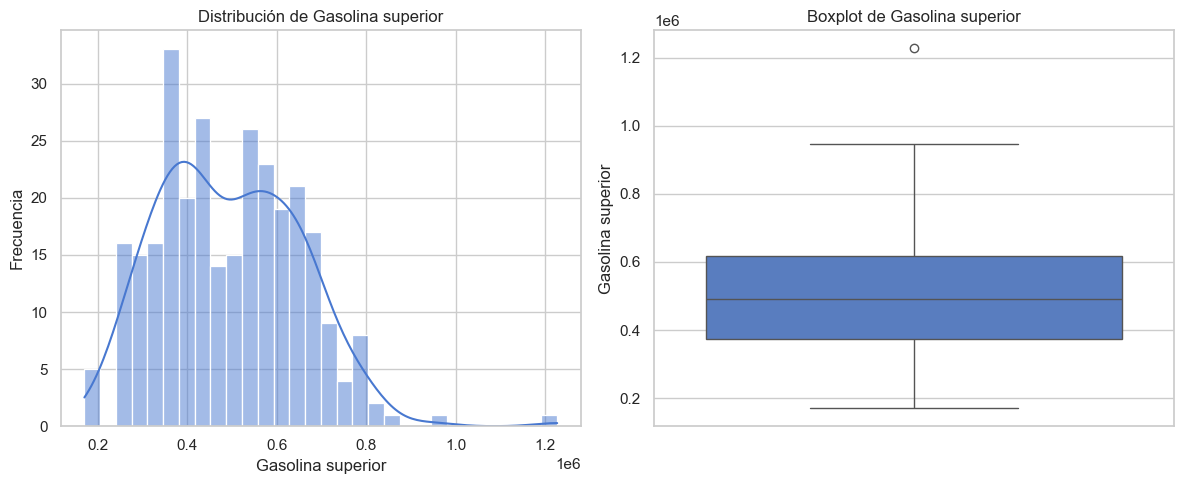

📊 La distribución de 'Gasolina superior' muestra una asimetría de 0.48 y una curtosis de 0.59.

----------------------------------------------------------------------


----------------------------------------------------------------------

--- 3. Análisis de Correlación ---

🔗 Matriz de Correlación de Pearson:

                           Diesel  Gas licuado de petróleo  Gasolina regular  \
Diesel                   1.000000                 0.541365          0.737977   
Gas licuado de petróleo  0.541365                 1.000000          0.717743   
Gasolina regular         0.737977                 0.717743          1.000000   
Gasolina superior        0.650415                 0.568808          0.793780   

                         Gasolina superior  
Diesel                            0.650415  
Gas licuado de petróleo           0.568808  
Gasolina regular                  0.793780  
Gasolina superior                 1.000000  




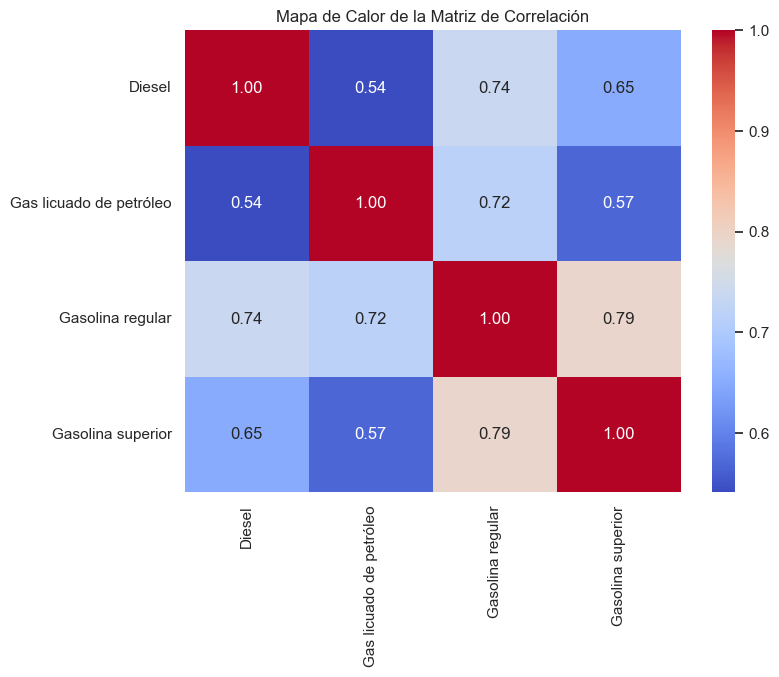

💡 Los valores cercanos a 1 o -1 indican una fuerte correlación positiva o negativa, respectivamente.

----------------------------------------------------------------------

--- 4. Histograma de 'Fecha' con cada Variable Numérica Continua ---



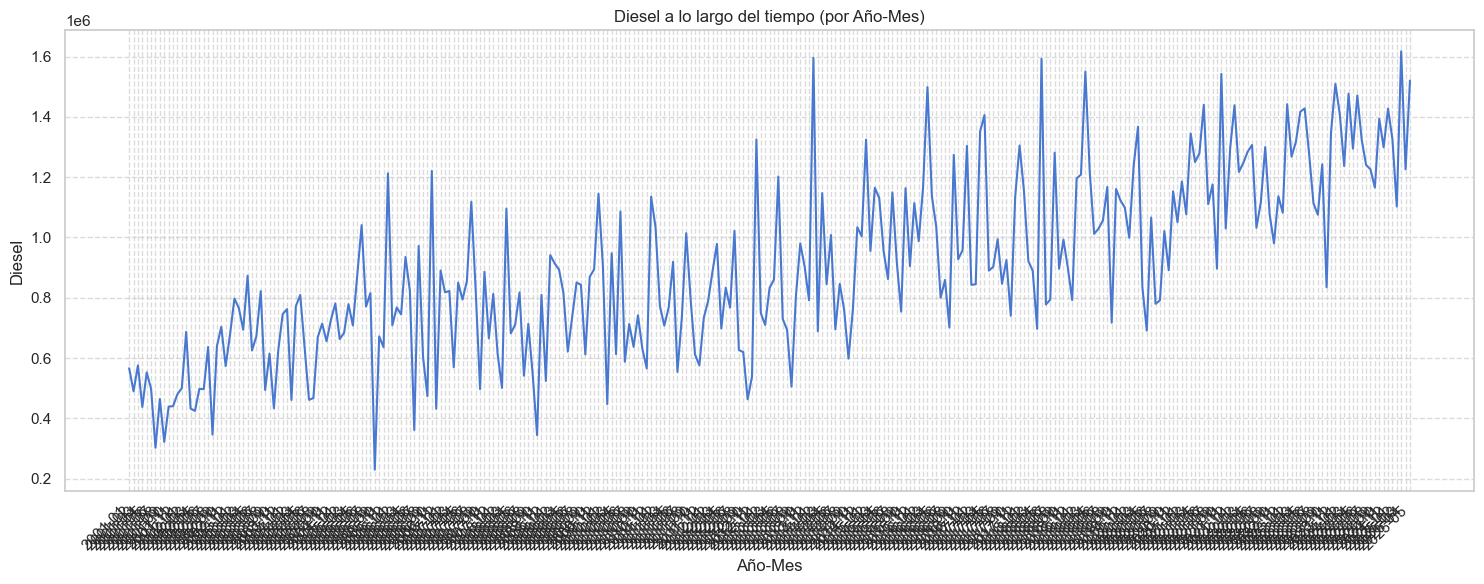

📈 Este gráfico muestra la tendencia de 'Diesel' a lo largo del tiempo, agrupado por año y mes.
----------------------------------------------------------------------



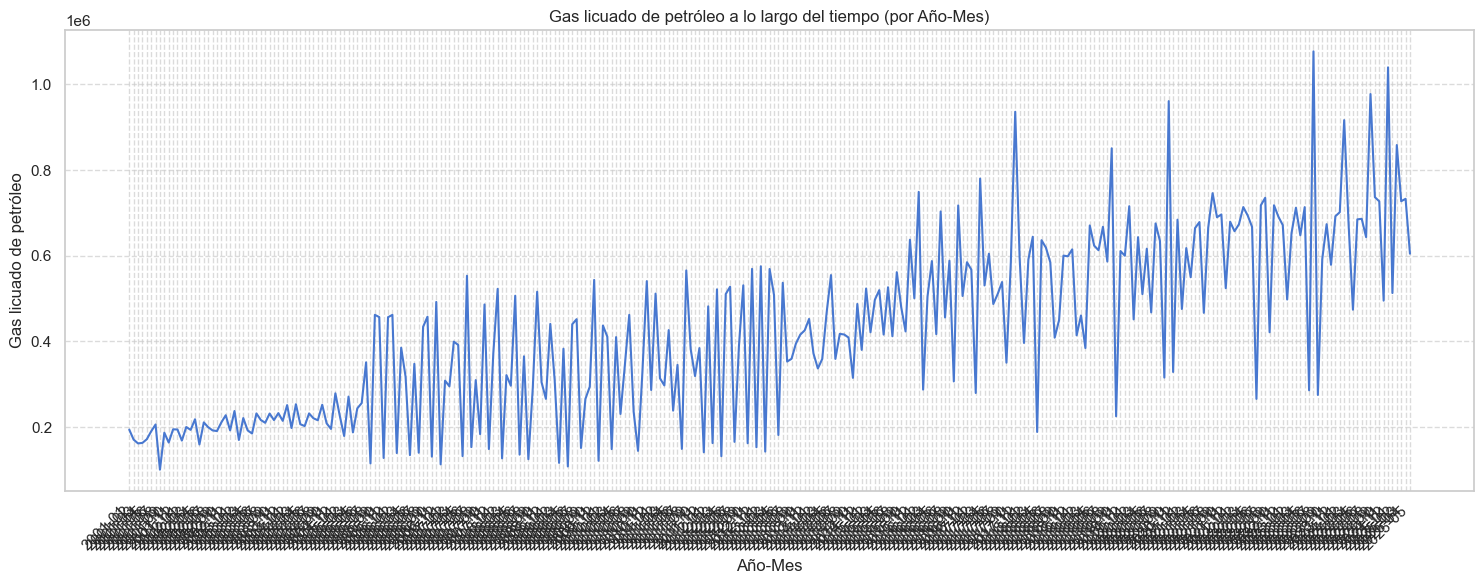

📈 Este gráfico muestra la tendencia de 'Gas licuado de petróleo' a lo largo del tiempo, agrupado por año y mes.
----------------------------------------------------------------------



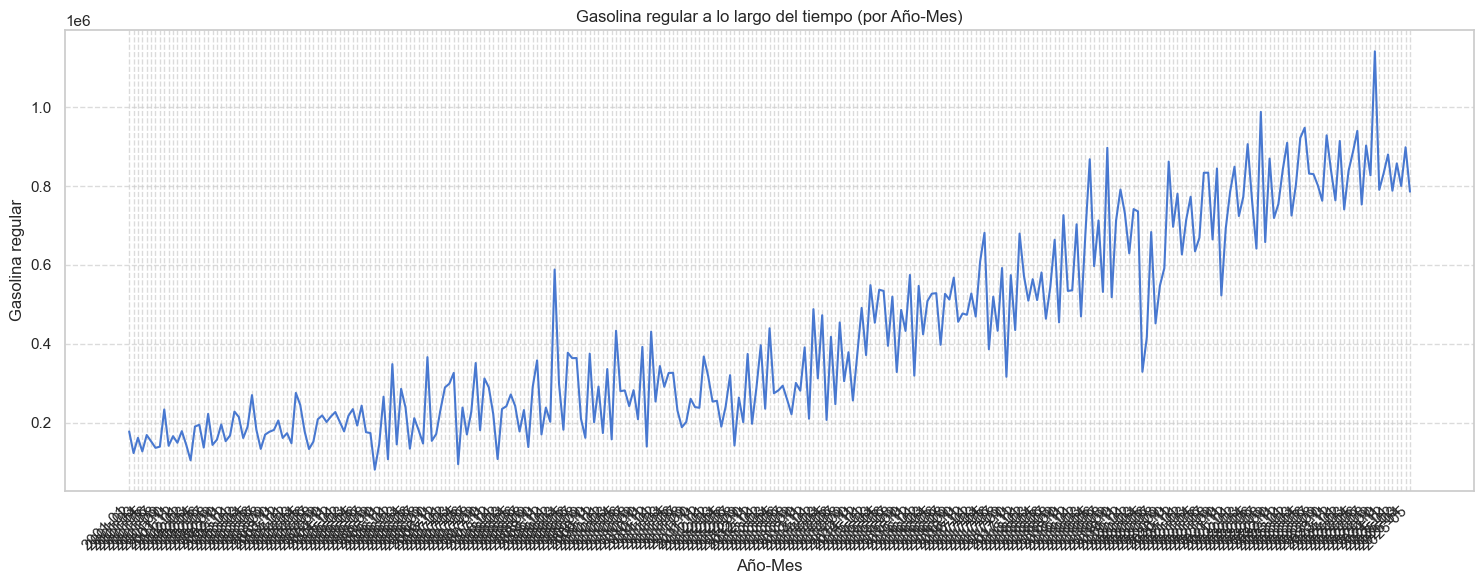

📈 Este gráfico muestra la tendencia de 'Gasolina regular' a lo largo del tiempo, agrupado por año y mes.
----------------------------------------------------------------------



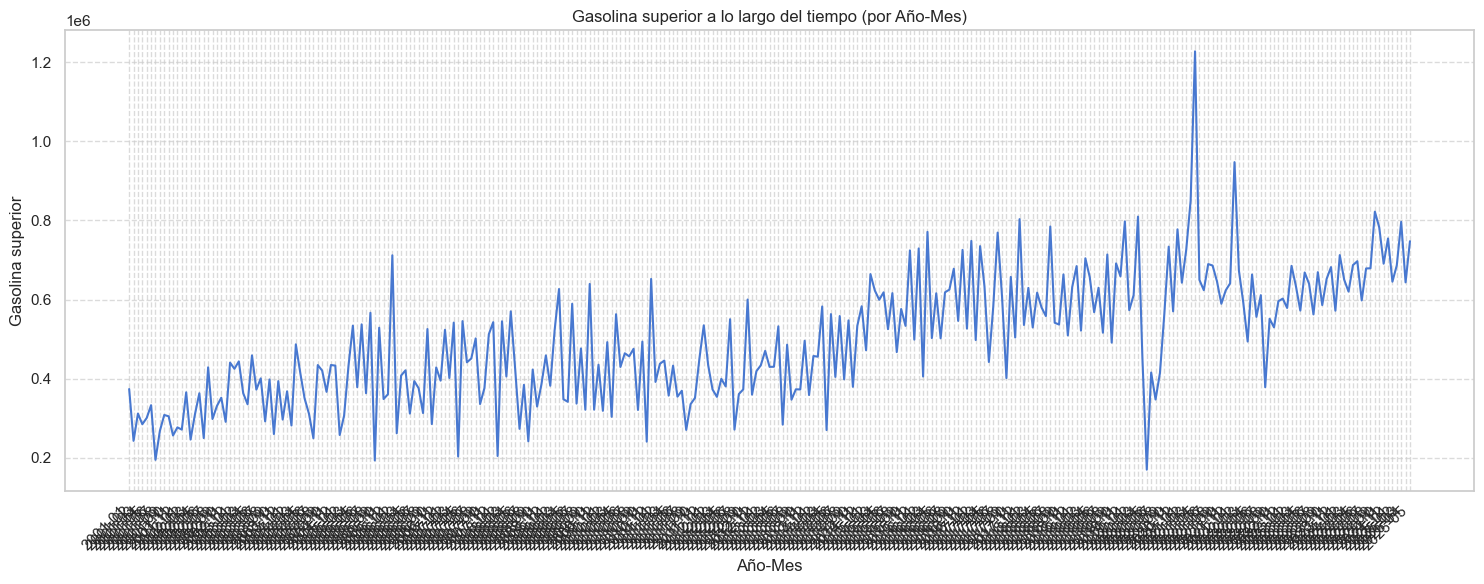

📈 Este gráfico muestra la tendencia de 'Gasolina superior' a lo largo del tiempo, agrupado por año y mes.
----------------------------------------------------------------------

✅ Análisis Exploratorio de Datos completado. ¡Espero que esta información sea útil! ✅


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def exploracion_eda(df, columnas_seleccionadas, columna_fecha):
    """
    Realiza un análisis exploratorio de datos (EDA) en columnas específicas de un DataFrame,
    incluyendo distribución, correlación y histogramas de fecha con variables numéricas.

    Args:
        df (pd.DataFrame): El DataFrame de Pandas a analizar.
        columnas_seleccionadas (list): Una lista de las 4 columnas específicas a analizar.
        columna_fecha (str): El nombre de la columna que contiene los datos de fecha.
    """

    print("🚀 Iniciando Análisis Exploratorio de Datos (EDA) 🚀\n")

    # Verificar que las columnas existan en el DataFrame
    for col in columnas_seleccionadas + [columna_fecha]:
        if col not in df.columns:
            print(f"❌ Error: La columna '{col}' no se encuentra en el DataFrame. Por favor, verifica los nombres.")
            return

    df_seleccionado = df[columnas_seleccionadas + [columna_fecha]].copy()

    # Convertir la columna de fecha a formato datetime
    try:
        df_seleccionado[columna_fecha] = pd.to_datetime(df_seleccionado[columna_fecha])
    except Exception as e:
        print(f"⚠️ Advertencia: No se pudo convertir la columna '{columna_fecha}' a datetime. Error: {e}")
        print("Continuando el análisis sin conversión de fecha para esta parte.")

    print(f"✨ Columnas seleccionadas para el análisis: {columnas_seleccionadas} y {columna_fecha}\n")

    # --- 1. Información General y Estadísticas Descriptivas ---
    print("--- 1. Información General y Estadísticas Descriptivas ---\n")
    print("📋 Información del DataFrame (primeras filas):\n")
    print(df_seleccionado.head())
    print("\n")

    print("📊 Estadísticas descriptivas de las columnas seleccionadas:\n")
    print(df_seleccionado[columnas_seleccionadas].describe().T)
    print("\n")

    print("🔎 Valores nulos por columna:\n")
    print(df_seleccionado[columnas_seleccionadas + [columna_fecha]].isnull().sum())
    print("\n" + "-"*70 + "\n")

    # --- 2. Análisis de Distribución (para columnas numéricas continuas) ---
    print("--- 2. Análisis de Distribución (Histogramas y Boxplots) ---\n")
    numeric_cols = df_seleccionado[columnas_seleccionadas].select_dtypes(include=np.number).columns.tolist()

    if not numeric_cols:
        print("ℹ️ No hay columnas numéricas continuas entre las seleccionadas para el análisis de distribución.")
    else:
        for col in numeric_cols:
            plt.figure(figsize=(12, 5))

            # Histograma
            plt.subplot(1, 2, 1)
            sns.histplot(df_seleccionado[col].dropna(), kde=True, bins=30)
            plt.title(f'Distribución de {col}')
            plt.xlabel(col)
            plt.ylabel('Frecuencia')

            # Boxplot
            plt.subplot(1, 2, 2)
            sns.boxplot(y=df_seleccionado[col].dropna())
            plt.title(f'Boxplot de {col}')
            plt.ylabel(col)

            plt.tight_layout()
            plt.show()
            print(f"📊 La distribución de '{col}' muestra una asimetría de {df_seleccionado[col].skew():.2f} y una curtosis de {df_seleccionado[col].kurtosis():.2f}.\n")
            print("-" * 70 + "\n")
    print("\n" + "-"*70 + "\n")

    # --- 3. Análisis de Correlación (entre columnas numéricas) ---
    print("--- 3. Análisis de Correlación ---\n")
    if len(numeric_cols) > 1:
        corr_matrix = df_seleccionado[numeric_cols].corr()
        print("🔗 Matriz de Correlación de Pearson:\n")
        print(corr_matrix)
        print("\n")

        plt.figure(figsize=(8, 6))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Mapa de Calor de la Matriz de Correlación')
        plt.show()
        print("💡 Los valores cercanos a 1 o -1 indican una fuerte correlación positiva o negativa, respectivamente.")
    else:
        print("ℹ️ Se necesitan al menos dos columnas numéricas para calcular la correlación.")
    print("\n" + "-"*70 + "\n")

    # --- 4. Histograma de la Fecha con cada Variable Numérica Continua ---
    print(f"--- 4. Histograma de '{columna_fecha}' con cada Variable Numérica Continua ---\n")
    if not numeric_cols:
        print(f"ℹ️ No hay columnas numéricas continuas para graficar con '{columna_fecha}'.")
    elif columna_fecha not in df_seleccionado.columns or not pd.api.types.is_datetime64_any_dtype(df_seleccionado[columna_fecha]):
        print(f"⚠️ No se puede generar el histograma de la fecha con variables numéricas porque '{columna_fecha}' no es un tipo de dato datetime válido.")
    else:
        # Extraer el año y el mes para una mejor visualización si la fecha es muy granular
        df_seleccionado['año_mes'] = df_seleccionado[columna_fecha].dt.to_period('M')
        df_seleccionado = df_seleccionado.sort_values(by=columna_fecha) # Asegurar orden temporal

        for col in numeric_cols:
            plt.figure(figsize=(15, 6))
            # Usamos lineplot para mostrar la tendencia a lo largo del tiempo
            sns.lineplot(x=df_seleccionado['año_mes'].astype(str), y=df_seleccionado[col])
            plt.title(f'{col} a lo largo del tiempo (por Año-Mes)')
            plt.xlabel('Año-Mes')
            plt.ylabel(col)
            plt.xticks(rotation=45, ha='right')
            plt.grid(True, linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()
            print(f"📈 Este gráfico muestra la tendencia de '{col}' a lo largo del tiempo, agrupado por año y mes.")
            print("-" * 70 + "\n")

    print("✅ Análisis Exploratorio de Datos completado. ¡Espero que esta información sea útil! ✅")

# --- Ejemplo de Uso con un archivo de Excel ---
if __name__ == '__main__':

    ruta_archivo_excel = "C:\\Users\\javie\\Documents\\UVG\\Cuarto año\\Segundo Semestre\\Data Science\\Archivos Lab1\\IMPORTACIONES.xlsx" 

    nombre_hoja_excel = 'Hoja1' 


    mis_columnas_a_analizar = ['Diesel', 'Gas licuado de petróleo', 'Gasolina regular', 'Gasolina superior'] 

    mi_columna_fecha_excel = 'Fecha' 

    print(f"Attempting to load Excel file from: {ruta_archivo_excel}")
    print(f"Using sheet name: {nombre_hoja_excel}")
    print(f"Selected columns: {mis_columnas_a_analizar}")
    print(f"Date column: {mi_columna_fecha_excel}\n")

    try:
        # Cargar el DataFrame desde el archivo de Excel
        df_desde_excel = pd.read_excel(ruta_archivo_excel, sheet_name=nombre_hoja_excel)
        print("✅ Archivo de Excel cargado exitosamente.\n")

        # Llamar a la función de análisis exploratorio con el DataFrame cargado
        exploracion_eda(df_desde_excel, mis_columnas_a_analizar, mi_columna_fecha_excel)

    except FileNotFoundError:
        print(f"❌ Error: El archivo '{ruta_archivo_excel}' no se encontró.")
        print("Por favor, verifica la ruta y el nombre del archivo.")
    except Exception as e:
        print(f"❌ Ocurrió un error al cargar el archivo de Excel o durante el análisis: {e}")
        print("Asegúrate de que la ruta, el nombre de la hoja y los nombres de las columnas sean correctos.")